In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import time


In [2]:
normal_data=pd.read_csv("Normal_data.csv")
metasploti_data=pd.read_csv("metasploitable-2.csv")
ovs_data=pd.read_csv("OVS.csv")

In [3]:
frames=[normal_data,metasploti_data,ovs_data]
data=pd.concat(frames,ignore_index=True)

In [4]:
data.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
343884,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019 05:19:55 PM,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343885,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,3431,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343886,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343887,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,5887,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343888,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,150,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [5]:
print(f"Normal data {len(normal_data.index)}")
print(f"Metaspploit data {len(metasploti_data.index)}")
print(f"OVS data {len(ovs_data.index)}")
print(f"Merge data {len(data.index)}")

Normal data 68424
Metaspploit data 136743
OVS data 138722
Merge data 343889


In [33]:
info=data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343889 entries, 0 to 343888
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            343889 non-null  object 
 1   Src IP             343889 non-null  object 
 2   Src Port           343889 non-null  int64  
 3   Dst IP             343889 non-null  object 
 4   Dst Port           343889 non-null  int64  
 5   Protocol           343889 non-null  int64  
 6   Timestamp          343889 non-null  object 
 7   Flow Duration      343889 non-null  int64  
 8   Tot Fwd Pkts       343889 non-null  int64  
 9   Tot Bwd Pkts       343889 non-null  int64  
 10  TotLen Fwd Pkts    343889 non-null  float64
 11  TotLen Bwd Pkts    343889 non-null  float64
 12  Fwd Pkt Len Max    343889 non-null  int64  
 13  Fwd Pkt Len Min    343889 non-null  int64  
 14  Fwd Pkt Len Mean   343889 non-null  float64
 15  Fwd Pkt Len Std    343889 non-null  float64
 16  Bw

In [34]:
data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,343889.000000,343889.000000,343889.000000,3.438890e+05,343889.000000,343889.000000,3.438890e+05,3.438890e+05,343889.000000,343889.000000,...,343889.000000,343889.0,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05
mean,21982.659541,8072.495366,4.961767,6.737171e+06,6.160331,6.119012,7.310557e+02,8.335005e+03,115.689356,4.447778,...,1.441541,0.0,6.385104e+04,3.105350e+04,1.086384e+05,4.185579e+04,4.708172e+06,1.443613e+05,4.843965e+06,4.581512e+06
std,23669.464108,16275.407358,4.862608,2.183354e+07,1554.168988,105.863392,6.965289e+04,3.429719e+05,666.519811,31.285832,...,39.470056,0.0,7.852718e+05,5.035601e+05,1.220601e+06,6.672299e+05,1.616113e+07,1.653491e+06,1.641612e+07,1.604560e+07
min,0.000000,0.000000,0.000000,-1.540000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,1.700000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,443.000000,80.000000,6.000000,2.530000e+03,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,43920.000000,2495.000000,6.000000,1.208600e+04,2.000000,4.000000,3.000000e+01,3.000000e+01,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65518.000000,65389.000000,17.000000,1.200000e+08,910748.000000,34094.000000,3.160000e+07,1.070000e+08,64239.000000,3900.000000,...,11180.000000,0.0,1.040000e+08,6.830000e+07,1.040000e+08,1.040000e+08,1.200000e+08,7.300000e+07,1.200000e+08,1.200000e+08


In [7]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [8]:
data.isnull().values.any()

False

In [9]:
data.describe()

,Src Port,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,343889.000000,343889.000000,343889.000000,3.438890e+05,343889.000000,343889.000000,3.438890e+05,3.438890e+05,343889.000000,343889.000000,...,343889.000000,343889.0,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05,3.438890e+05
mean,21982.659541,8072.495366,4.961767,6.737171e+06,6.160331,6.119012,7.310557e+02,8.335005e+03,115.689356,4.447778,...,1.441541,0.0,6.385104e+04,3.105350e+04,1.086384e+05,4.185579e+04,4.708172e+06,1.443613e+05,4.843965e+06,4.581512e+06
std,23669.464108,16275.407358,4.862608,2.183354e+07,1554.168988,105.863392,6.965289e+04,3.429719e+05,666.519811,31.285832,...,39.470056,0.0,7.852718e+05,5.035601e+05,1.220601e+06,6.672299e+05,1.616113e+07,1.653491e+06,1.641612e+07,1.604560e+07
min,0.000000,0.000000,0.000000,-1.540000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,1.700000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,443.000000,80.000000,6.000000,2.530000e+03,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,43920.000000,2495.000000,6.000000,1.208600e+04,2.000000,4.000000,3.000000e+01,3.000000e+01,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65518.000000,65389.000000,17.000000,1.200000e+08,910748.000000,34094.000000,3.160000e+07,1.070000e+08,64239.000000,3900.000000,...,11180.000000,0.0,1.040000e+08,6.830000e+07,1.040000e+08,1.040000e+08,1.200000e+08,7.300000e+07,1.200000e+08,1.200000e+08


In [10]:
print(data.Label.unique())

['Normal' 'U2R' 'BFA' 'DDoS' 'DoS' 'Probe' 'DDoS ' 'Web-Attack' 'BOTNET']


In [11]:
data.Label = data.Label.str.replace(' ', '')
print(data.Label.unique())

['Normal' 'U2R' 'BFA' 'DDoS' 'DoS' 'Probe' 'Web-Attack' 'BOTNET']


for item in data.columns:
    print(data[item].describe())
    print("-"*50)

In [12]:
 (data != 0).any(axis=0)

Flow ID      True
Src IP       True
Src Port     True
Dst IP       True
Dst Port     True
             ... 
Idle Mean    True
Idle Std     True
Idle Max     True
Idle Min     True
Label        True
Length: 84, dtype: bool

In [13]:
data2=data.loc[:, (data != 0).any(axis=0)]

In [14]:
(data==0).all().sum()

11

In [15]:
data.loc[:, (data == 0).all()]

,Fwd PSH Flags,Fwd URG Flags,CWE Flag Count,ECE Flag Cnt,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Fwd Seg Size Min
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
343884,0,0,0,0,0,0,0,0,0,0,0
343885,0,0,0,0,0,0,0,0,0,0,0
343886,0,0,0,0,0,0,0,0,0,0,0
343887,0,0,0,0,0,0,0,0,0,0,0


In [16]:
data2.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Header Len',
       'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var',
       'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt',
       'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd

In [17]:
data2.tail()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
343884,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019 05:19:55 PM,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343885,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,3431,2,5,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343886,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343887,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,5887,2,5,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343888,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,150,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [18]:
data2['Timestamp']=pd.to_datetime(data2.Timestamp)

<ipython-input-18-b6f8c5aeca26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Timestamp']=pd.to_datetime(data2.Timestamp)


In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343889 entries, 0 to 343888
Data columns (total 73 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Flow ID            343889 non-null  object        
 1   Src IP             343889 non-null  object        
 2   Src Port           343889 non-null  int64         
 3   Dst IP             343889 non-null  object        
 4   Dst Port           343889 non-null  int64         
 5   Protocol           343889 non-null  int64         
 6   Timestamp          343889 non-null  datetime64[ns]
 7   Flow Duration      343889 non-null  int64         
 8   Tot Fwd Pkts       343889 non-null  int64         
 9   Tot Bwd Pkts       343889 non-null  int64         
 10  TotLen Fwd Pkts    343889 non-null  float64       
 11  TotLen Bwd Pkts    343889 non-null  float64       
 12  Fwd Pkt Len Max    343889 non-null  int64         
 13  Fwd Pkt Len Min    343889 non-null  int64   

In [20]:
data2.shape

(343889, 73)

In [21]:
data2['Timestamp'] = data2['Timestamp'].dt.strftime('%d/%m/%Y')

<ipython-input-21-da5dd5cc3e27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Timestamp'] = data2['Timestamp'].dt.strftime('%d/%m/%Y')


In [22]:
plot_data=data2.set_index('Timestamp')
plot_data.index=pd.to_datetime(plot_data.index)
plot_data.sort_index(inplace=True)
plot_data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-12-25,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,150,1,1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
2019-12-25,172.17.0.2-200.175.2.130-80-55072-6,200.175.2.130,55072,172.17.0.2,80,6,6944,2,5,597.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
2019-12-25,172.17.0.2-200.175.2.130-80-55070-6,200.175.2.130,55070,172.17.0.2,80,6,180,1,1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
2019-12-25,172.17.0.2-200.175.2.130-80-55070-6,200.175.2.130,55070,172.17.0.2,80,6,10628,2,5,597.0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
2019-12-25,172.17.0.2-200.175.2.130-80-55064-6,200.175.2.130,55064,172.17.0.2,80,6,4770,1,1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


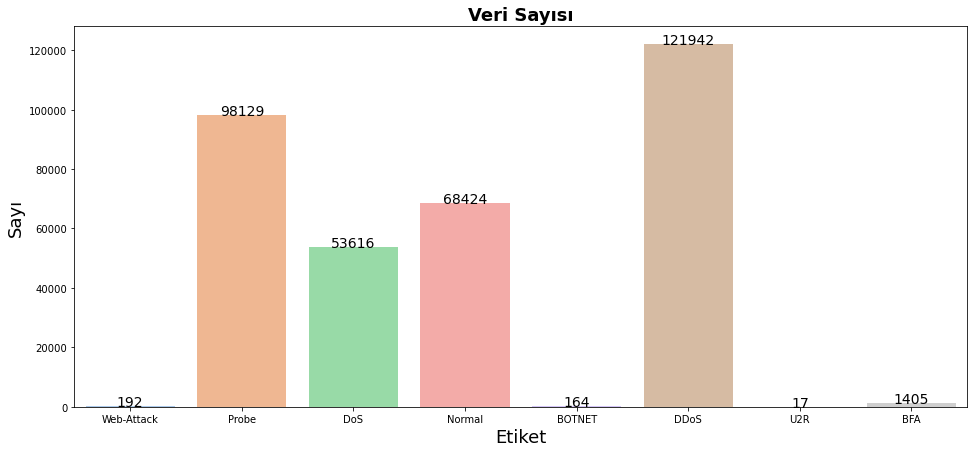

In [23]:
countplt, ax = plt.subplots(figsize = (16,7))
ax =sns.countplot(x = 'Label', data=plot_data, palette='pastel')
ax.set_title('Veri Sayısı',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Etiket', fontsize = 18)
ax.set_ylabel('Sayı', fontsize = 18)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 14)

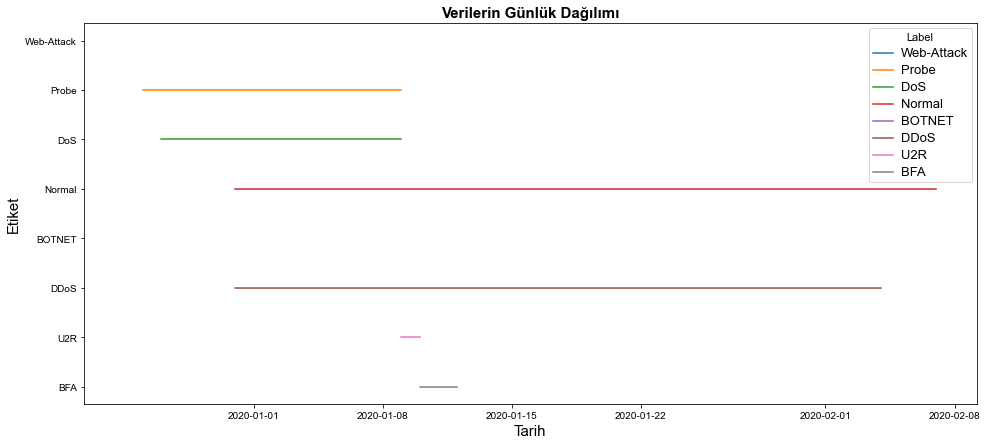

In [24]:
countplt, ax = plt.subplots(figsize = (16,7))
ax = sns.lineplot(x="Timestamp", y="Label",hue="Label",  data=plot_data)
ax.set_title('Verilerin Günlük Dağılımı',fontsize = 15, fontweight='bold' )
ax.set_xlabel('Tarih', fontsize = 15)
ax.set_ylabel('Etiket', fontsize = 15)
plt.setp(ax.get_legend().get_texts(), fontsize='13') 
plt.setp(ax.get_legend().get_title(), fontsize='11') 
sns.set_style("darkgrid", {"grid.color": ".15", "grid.linestyle": ":"})

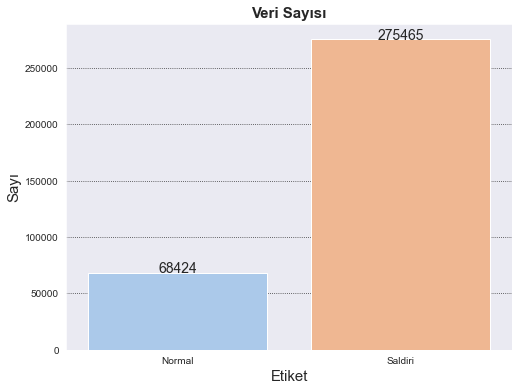

In [25]:
data3=data
data3.Label
data3.Label.replace(['U2R','BFA','DDoS','DoS','Probe','Web-Attack','BOTNET'],'Saldiri',inplace=True)
countplt, ax = plt.subplots(figsize = (8,6))
ax =sns.countplot(x = 'Label', data=data3, palette='pastel')
ax.set_title('Veri Sayısı',fontsize = 15, fontweight='bold' )
ax.set_xlabel('Etiket', fontsize = 15)
ax.set_ylabel('Sayı', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 14)

In [26]:
data2

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,02/05/2020,245230,44,40,...,41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,02/05/2020,1605449,107,149,...,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,02/05/2020,53078,5,5,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,02/05/2020,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,02/05/2020,190141,13,16,...,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343884,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343885,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019,3431,2,5,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343886,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
343887,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019,5887,2,5,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [27]:
data3 = data2.loc[:, data2.columns.difference(['Flow ID', 'Src IP','Dst IP','Timestamp','Src Port','Dst Port','Protocol'])]
data3=data3.sample(frac=1, replace=True, random_state=3).reset_index(drop=True)
data3.head()

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
0,0,0.0,0.0,0.0,0.0,0,12.0,12.0,12.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,64,3369.0,3369.0,3369.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0,13.0,13.0,13.0,0.00000,...,0,0,2,0,0,2,0,0.0,0.0,0
3,1,0.0,0.0,0.0,0.0,20,0.0,0.0,0.0,0.00000,...,0,0,1,248,2,1,2,0.0,248.0,0
4,0,0.0,0.0,0.0,0.0,144,167136.0,115976.2,2573.0,72264.35192,...,1,3510,6,370,7,6,7,3510.0,370.0,0


In [28]:
data_not_label=data3[data3.columns[~data3.columns.isin(['Label'])]]
label=data3.Label
print(data_not_label.shape)
print(label.shape)

(343889, 65)
(343889,)


In [29]:
x = data_not_label.values #returns a numpy array
column_name=data_not_label.columns
len(column_name)

65

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.32019231e-05, 1.32019231e-05, ...,
        4.36046512e-07, 9.49367089e-07, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [179]:
data_normalize = pd.DataFrame(x_scaled)
data_normalize.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000001,0.000002,0.000002,0.000000,...,0.0,0.000000,0.000050,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,0.0
1,1.0,0.0,0.0,0.0,0.0,0.000161,0.000029,0.000042,0.000042,0.000000,...,0.0,0.000000,0.000050,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000001,0.000002,0.000002,0.000000,...,0.0,0.000000,0.000050,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,0.0
3,1.0,0.0,0.0,0.0,0.0,0.000050,0.000001,0.000002,0.000002,0.000000,...,0.0,0.000000,0.000000,0.000008,0.000178,0.000000,0.000178,0.000000,0.000008,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000363,0.001394,0.001369,0.000032,0.001127,...,1.0,0.000051,0.000252,0.000012,0.000621,0.000252,0.000621,0.000051,0.000012,0.0


In [180]:
data_normalize.columns=column_name
data_normalize

,ACK Flag Cnt,Active Max,Active Mean,Active Min,Active Std,Bwd Header Len,Bwd IAT Max,Bwd IAT Mean,Bwd IAT Min,Bwd IAT Std,...,SYN Flag Cnt,Subflow Bwd Byts,Subflow Bwd Pkts,Subflow Fwd Byts,Subflow Fwd Pkts,Tot Bwd Pkts,Tot Fwd Pkts,TotLen Bwd Pkts,TotLen Fwd Pkts,URG Flag Cnt
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000001,0.000002,0.000002,0.000000,...,0.0,0.000000e+00,0.000050,0.000000e+00,0.000000,0.000050,0.000000,0.000000e+00,0.000000e+00,0.0
1,1.0,0.000000,0.000000,0.000000,0.0,0.000161,0.000029,0.000042,0.000042,0.000000,...,0.0,0.000000e+00,0.000050,0.000000e+00,0.000000,0.000050,0.000000,0.000000e+00,0.000000e+00,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000001,0.000002,0.000002,0.000000,...,0.0,0.000000e+00,0.000050,0.000000e+00,0.000000,0.000050,0.000000,0.000000e+00,0.000000e+00,0.0
3,1.0,0.000000,0.000000,0.000000,0.0,0.000050,0.000001,0.000002,0.000002,0.000000,...,0.0,0.000000e+00,0.000000,7.856767e-06,0.000178,0.000000,0.000178,0.000000e+00,7.848101e-06,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000363,0.001394,0.001369,0.000032,0.001127,...,1.0,5.099759e-05,0.000252,1.172179e-05,0.000621,0.000252,0.000621,5.101744e-05,1.170886e-05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343884,0.0,0.000000,0.000000,0.000000,0.0,0.000363,0.000095,0.000046,0.000002,0.000100,...,1.0,4.358768e-07,0.000151,9.504153e-07,0.000355,0.000151,0.000355,4.360465e-07,9.493671e-07,0.0
343885,0.0,0.000000,0.000000,0.000000,0.0,0.000524,0.015522,0.004426,0.000002,0.012971,...,1.0,2.743118e-05,0.000252,4.942160e-05,0.000533,0.000252,0.000533,2.744186e-05,4.936709e-05,0.0
343886,1.0,0.000000,0.000000,0.000000,0.0,0.000101,0.000010,0.000015,0.000015,0.000000,...,0.0,0.000000e+00,0.000050,0.000000e+00,0.000000,0.000050,0.000000,0.000000e+00,0.000000e+00,0.0
343887,1.0,0.000013,0.000013,0.000013,0.0,0.000584,0.505001,0.119105,0.000002,0.385335,...,0.0,4.358768e-07,0.000302,9.504153e-07,0.000266,0.000302,0.000266,4.360465e-07,9.493671e-07,0.0


In [181]:
for i in data_normalize.columns:
    print(i)

ACK Flag Cnt
Active Max
Active Mean
Active Min
Active Std
Bwd Header Len
Bwd IAT Max
Bwd IAT Mean
Bwd IAT Min
Bwd IAT Std
Bwd IAT Tot
Bwd PSH Flags
Bwd Pkt Len Max
Bwd Pkt Len Mean
Bwd Pkt Len Min
Bwd Pkt Len Std
Bwd Pkts/s
Bwd Seg Size Avg
Bwd URG Flags
Down/Up Ratio
FIN Flag Cnt
Flow Byts/s
Flow Duration
Flow IAT Max
Flow IAT Mean
Flow IAT Min
Flow IAT Std
Flow Pkts/s
Fwd Act Data Pkts
Fwd Header Len
Fwd IAT Max
Fwd IAT Mean
Fwd IAT Min
Fwd IAT Std
Fwd IAT Tot
Fwd Pkt Len Max
Fwd Pkt Len Mean
Fwd Pkt Len Min
Fwd Pkt Len Std
Fwd Pkts/s
Fwd Seg Size Avg
Idle Max
Idle Mean
Idle Min
Idle Std
Init Bwd Win Byts
Init Fwd Win Byts
PSH Flag Cnt
Pkt Len Max
Pkt Len Mean
Pkt Len Min
Pkt Len Std
Pkt Len Var
Pkt Size Avg
RST Flag Cnt
SYN Flag Cnt
Subflow Bwd Byts
Subflow Bwd Pkts
Subflow Fwd Byts
Subflow Fwd Pkts
Tot Bwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts
TotLen Fwd Pkts
URG Flag Cnt


In [182]:
label.replace(['U2R','BFA','DDoS','DoS','Probe','Web-Attack','BOTNET'],'Saldiri',inplace=True)
label.unique()

array(['Saldiri', 'Normal'], dtype=object)

In [183]:
#tags= pd.get_dummies(label)
label.replace("Saldiri","1",inplace=True)
label.replace("Normal","0",inplace=True)
label

0         1
1         1
2         1
3         0
4         0
         ..
343884    1
343885    1
343886    1
343887    1
343888    1
Name: Label, Length: 343889, dtype: object

In [184]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled=sc.fit_transform(data_normalize)
X_scaled

array([[-0.61566854, -0.08817253, -0.07895971, ..., -0.02986745,
        -0.00860033, -0.10935765],
       [ 1.62425061, -0.08817253, -0.07895971, ..., -0.02986745,
        -0.00860033, -0.10935765],
       [-0.61566854, -0.08817253, -0.07895971, ..., -0.02986745,
        -0.00860033, -0.10935765],
       ...,
       [ 1.62425061, -0.08817253, -0.07895971, ..., -0.02986745,
        -0.00860033, -0.10935765],
       [ 1.62425061, -0.08709042, -0.07730406, ..., -0.02974927,
        -0.00829775, -0.10935765],
       [ 1.62425061, -0.08817253, -0.07895971, ..., -0.02986745,
        -0.00860033, -0.10935765]])

In [185]:
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(X_scaled,label, test_size=0.25, random_state=1)

In [186]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\Birol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9967315319926023

In [187]:
from sklearn.decomposition import PCA

In [188]:
pca = PCA(20)
X_pca=pca.fit(X_scaled)
X_pca


PCA(n_components=20)

In [189]:
pca.n_components


20

In [190]:
#X_train_pca = pca.fit_transform(X_train_std)

In [191]:
X_test_pca = pca.transform(data_normalize)

In [192]:
X_test_pca

array([[-1.01424917e-02,  1.09621175e-04,  6.68563764e-03, ...,
        -1.42397234e-02,  8.48088547e-03, -6.11120028e-03],
       [ 1.85243808e-01, -1.94144773e-01,  5.05443919e-02, ...,
        -1.93360672e-01,  2.41541781e-02, -2.19938439e-01],
       [-9.38793697e-03,  1.14744976e-04,  6.17348503e-03, ...,
        -1.31193223e-02,  7.94619689e-03, -5.64217813e-03],
       ...,
       [ 1.00250700e-01, -8.78499085e-02,  1.22869702e-02, ...,
        -1.05339227e-01,  9.24497391e-03, -4.58478256e-02],
       [ 1.23782781e+00, -8.59190397e-01,  7.13311121e-02, ...,
        -1.79324399e-01,  8.60311519e-02, -1.63585461e-01],
       [ 1.00378857e-01, -8.78787429e-02,  1.22328959e-02, ...,
        -1.05216424e-01,  9.18971318e-03, -4.57931100e-02]])

In [193]:
pca.explained_variance_ratio_

array([0.19058574, 0.15660678, 0.09970177, 0.06222627, 0.05995012,
       0.04627191, 0.04289981, 0.03747427, 0.03405999, 0.03033705,
       0.02850396, 0.02250442, 0.02031292, 0.01758426, 0.01581483,
       0.0153898 , 0.01214805, 0.0120958 , 0.01153715, 0.01004603])

In [194]:
sum(pca.explained_variance_ratio_)

0.9260509275879983

In [206]:
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = column_name

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(sorted(dic.items()))

In [207]:
df

,0,1
0,PC1,Flow Duration
1,PC10,Flow Pkts/s
2,PC11,Bwd IAT Min
3,PC12,Fwd Pkts/s
4,PC13,RST Flag Cnt
5,PC14,Fwd IAT Min
6,PC15,Fwd IAT Min
7,PC16,Active Std
8,PC17,Idle Std
9,PC18,Init Bwd Win Byts


In [197]:
column_name

Index(['ACK Flag Cnt', 'Active Max', 'Active Mean', 'Active Min', 'Active Std',
       'Bwd Header Len', 'Bwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min',
       'Bwd IAT Std', 'Bwd IAT Tot', 'Bwd PSH Flags', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Mean', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'Bwd Pkts/s',
       'Bwd Seg Size Avg', 'Bwd URG Flags', 'Down/Up Ratio', 'FIN Flag Cnt',
       'Flow Byts/s', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean',
       'Flow IAT Min', 'Flow IAT Std', 'Flow Pkts/s', 'Fwd Act Data Pkts',
       'Fwd Header Len', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min',
       'Fwd IAT Std', 'Fwd IAT Tot', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Std', 'Fwd Pkts/s', 'Fwd Seg Size Avg',
       'Idle Max', 'Idle Mean', 'Idle Min', 'Idle Std', 'Init Bwd Win Byts',
       'Init Fwd Win Byts', 'PSH Flag Cnt', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'Pkt Size Avg',
       'RST Flag Cnt', 'SYN

In [198]:
pca.explained_variance_ratio_

array([0.19058574, 0.15660678, 0.09970177, 0.06222627, 0.05995012,
       0.04627191, 0.04289981, 0.03747427, 0.03405999, 0.03033705,
       0.02850396, 0.02250442, 0.02031292, 0.01758426, 0.01581483,
       0.0153898 , 0.01214805, 0.0120958 , 0.01153715, 0.01004603])

In [199]:
def corrResult(min_corr, max_corr, data, method):
    '''
    :param min_corr: minimum ilişki düzeyinin belirlenmesi
    :param max_corr: maksimum ilişki düzeyi
    :param data: veri seti
    :return: sonuç doğrudan print edilir
    '''
    liste=[]
    liste_name=[]
    for i in range(0, len(data.columns)):
        
        for j in range(0, len(data.columns)):
            if i != j and j>i:
                corr_1 = np.abs(data[data.columns[i]].corr(data[data.columns[j]],method = f"{method}"))
                if corr_1 < min_corr:
                    pass
                    #print(data.columns[i], " ile ", data.columns[j], "arasında bir ilişki yoktur")
                elif corr_1 > max_corr:
                    if j not in liste:
                        liste.append(j)
                        liste_name.append(data.columns[j])
                    if i not in liste:
                        liste.append(i)
                        liste_name.append(data.columns[i])
    print(f"{method} liste {liste}")
    for i in range(len(liste)):
        print(f"{liste_name[i]} , {liste[i]}")
        
    

In [200]:
corrResult(min_corr = 0.5, max_corr = 0.99, data = data_normalize, method="spearman")

C:\Users\Birol\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


spearman liste [2, 1, 3, 10, 6, 47, 11, 13, 12, 17, 56, 62, 23, 16, 27, 64, 18, 22, 24, 59, 29, 61, 31, 30, 34, 36, 35, 40, 58, 63, 42, 41, 43, 49, 48, 51, 52, 53, 60, 57]
Active Mean , 2
Active Max , 1
Active Min , 3
Bwd IAT Tot , 10
Bwd IAT Max , 6
PSH Flag Cnt , 47
Bwd PSH Flags , 11
Bwd Pkt Len Mean , 13
Bwd Pkt Len Max , 12
Bwd Seg Size Avg , 17
Subflow Bwd Byts , 56
TotLen Bwd Pkts , 62
Flow IAT Max , 23
Bwd Pkts/s , 16
Flow Pkts/s , 27
URG Flag Cnt , 64
Bwd URG Flags , 18
Flow Duration , 22
Flow IAT Mean , 24
Subflow Fwd Pkts , 59
Fwd Header Len , 29
Tot Fwd Pkts , 61
Fwd IAT Mean , 31
Fwd IAT Max , 30
Fwd IAT Tot , 34
Fwd Pkt Len Mean , 36
Fwd Pkt Len Max , 35
Fwd Seg Size Avg , 40
Subflow Fwd Byts , 58
TotLen Fwd Pkts , 63
Idle Mean , 42
Idle Max , 41
Idle Min , 43
Pkt Len Mean , 49
Pkt Len Max , 48
Pkt Len Std , 51
Pkt Len Var , 52
Pkt Size Avg , 53
Tot Bwd Pkts , 60
Subflow Bwd Pkts , 57


In [201]:
corrResult(min_corr = 0.5, max_corr = 0.99, data = data_normalize, method="kendall")

C:\Users\Birol\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


kendall liste [2, 1, 47, 11, 17, 13, 64, 18, 34, 30, 40, 36, 42, 41, 43, 53, 49, 52, 51, 62, 56, 60, 57, 63, 58, 61, 59]
Active Mean , 2
Active Max , 1
PSH Flag Cnt , 47
Bwd PSH Flags , 11
Bwd Seg Size Avg , 17
Bwd Pkt Len Mean , 13
URG Flag Cnt , 64
Bwd URG Flags , 18
Fwd IAT Tot , 34
Fwd IAT Max , 30
Fwd Seg Size Avg , 40
Fwd Pkt Len Mean , 36
Idle Mean , 42
Idle Max , 41
Idle Min , 43
Pkt Size Avg , 53
Pkt Len Mean , 49
Pkt Len Var , 52
Pkt Len Std , 51
TotLen Bwd Pkts , 62
Subflow Bwd Byts , 56
Tot Bwd Pkts , 60
Subflow Bwd Pkts , 57
TotLen Fwd Pkts , 63
Subflow Fwd Byts , 58
Tot Fwd Pkts , 61
Subflow Fwd Pkts , 59


In [202]:
# Gerekli kütüphanelerin kurulması
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# Kalmasını istediğiniz değişken sayısı
select_k = 40
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(data_normalize,label, test_size=0.25, random_state=3)
# Değişkenlerin seçim stratejisi belirlenir
# f_classif = ANOVA yönteminin kullanılmasıdır
selection = SelectKBest(f_classif, k=select_k).fit(X_train, y_train)

# İlişkili olan değişkenler gösterilir.
features = X_train.columns[selection.get_support()]
for i in features:
    print(i)

Active Max
Active Mean
Active Std
Bwd IAT Tot
Bwd PSH Flags
Bwd Pkt Len Max
Bwd Pkt Len Mean
Bwd Pkt Len Min
Bwd Pkt Len Std
Bwd Pkts/s
Bwd Seg Size Avg
Down/Up Ratio
FIN Flag Cnt
Flow Byts/s
Flow Duration
Flow Pkts/s
Fwd IAT Max
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Tot
Fwd Pkt Len Max
Fwd Pkt Len Mean
Fwd Pkt Len Min
Fwd Pkt Len Std
Fwd Seg Size Avg
Idle Std
Init Bwd Win Byts
PSH Flag Cnt
Pkt Len Max
Pkt Len Mean
Pkt Len Min
Pkt Len Std
Pkt Len Var
Pkt Size Avg
Subflow Bwd Byts
Subflow Bwd Pkts
Subflow Fwd Pkts
Tot Bwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts


C:\Users\Birol\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [46] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\Birol\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [203]:
# Gerekli kütüphanelerin kurulması
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Kalmasını istediğiniz değişken sayısı
select_k = 40

# Değişkenlerin seçim stratejisi belirlenir
# chi2 = Ki-kare yönteminin kullanılmasıdır
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(data_normalize,label, test_size=0.25, random_state=1)
selection = SelectKBest(chi2, k=select_k).fit(X_train, y_train)

# İlişkili olan değişkenler gösterilir.
features = X_train.columns[selection.get_support()]
for i in features:
    print(i)

ACK Flag Cnt
Active Max
Active Mean
Active Std
Bwd IAT Tot
Bwd PSH Flags
Bwd Pkt Len Max
Bwd Pkt Len Mean
Bwd Pkt Len Min
Bwd Pkt Len Std
Bwd Pkts/s
Bwd Seg Size Avg
Bwd URG Flags
Down/Up Ratio
FIN Flag Cnt
Flow Byts/s
Flow Duration
Flow Pkts/s
Fwd IAT Max
Fwd IAT Mean
Fwd IAT Std
Fwd IAT Tot
Fwd Pkt Len Max
Fwd Pkt Len Mean
Fwd Pkt Len Min
Fwd Pkt Len Std
Fwd Pkts/s
Fwd Seg Size Avg
Idle Std
Init Bwd Win Byts
PSH Flag Cnt
Pkt Len Max
Pkt Len Mean
Pkt Len Min
Pkt Len Std
Pkt Len Var
Pkt Size Avg
SYN Flag Cnt
Tot Fwd Pkts
URG Flag Cnt


In [204]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Kalmasını istediğiniz değişken sayısı
select_k = 40
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(data_normalize,label, test_size=0.25, random_state=1)

# Değişkenlerin seçim stratejisi belirlenir
# mutual_info_classif = ortalı bilgi yönteminin kullanılmasıdır
selection = SelectKBest(mutual_info_classif, k=select_k).fit(X_train, y_train)

# İlişkili olan değişkenler gösterilir.
features = X_train.columns[selection.get_support()]
for i in features:
    print(i)
    

Bwd Header Len
Bwd IAT Max
Bwd IAT Mean
Bwd IAT Std
Bwd IAT Tot
Bwd Pkt Len Max
Bwd Pkt Len Mean
Bwd Pkt Len Min
Bwd Pkt Len Std
Bwd Pkts/s
Bwd Seg Size Avg
Down/Up Ratio
Flow Byts/s
Flow Duration
Flow IAT Max
Flow IAT Mean
Flow IAT Min
Flow IAT Std
Flow Pkts/s
Fwd Header Len
Fwd Pkt Len Max
Fwd Pkt Len Mean
Fwd Pkt Len Min
Fwd Pkts/s
Fwd Seg Size Avg
Init Bwd Win Byts
Pkt Len Max
Pkt Len Mean
Pkt Len Min
Pkt Len Std
Pkt Len Var
Pkt Size Avg
Subflow Bwd Byts
Subflow Bwd Pkts
Subflow Fwd Byts
Subflow Fwd Pkts
Tot Bwd Pkts
Tot Fwd Pkts
TotLen Bwd Pkts
TotLen Fwd Pkts


In [157]:
def forwardSelection(x, y, p_value_level=0.05):
    '''
    İleri doğru seçim yönteminin fonksiyonu
    :param x: girdi/bağımsız değişkenler
    :param y: çıktı/bağımlı değişken
    :param pvalue: anlamlılık değeri %95 güven aralığı
    :return: model için çıkarılan anlamlı değişkenler
    '''
    # başlangıç değişkenleri
    initial_features = x.columns.tolist()
    # en iyi değişkenlerin listesi
    best_features = []

    loop_count = 0
    
    # değişken sayısı kadar while döngüsünün çalışması
    while (len(initial_features) > 0):

        # bilgilendirici
        loop_count += 1
        print(f"\n=======================================")
        print(f"{loop_count}. While döngüsü başlıyor...\n")

        # seçilen değişkenler kalan değişkenlerden çıkarılır
        remaining_features = list(set(initial_features) - set(best_features))
        print(f"Hesaplanacak değişkenler:\n{remaining_features}")

        # kalan değişkenler için p değer tablosu
        new_pval = pd.Series(index=remaining_features)

       # kalan değişkenlerin tek p değeri hesaplanır
        for feature in remaining_features:
            # verilen değişkenler ile model oluşturulur
            model = sm.OLS(y.astype(float), x.astype(float)).fit()
            #model = sm.OLS(y, sm.add_constant(x[best_features + [feature]])).fit()

            # newpval tablosuna değişken ismi ve p değeri eklenir
            new_pval[feature] = model.pvalues[feature]

        # new_pval tablosundaki minimum p değeri alınır
        min_p_value = new_pval.min()

        # eğer p değeri 0.05 altındaysa while döngüsü devam eder
        if(min_p_value < p_value_level):
            best_features.append(new_pval.idxmin())
            print("\n0.05'ten küçük olmak şartı ile\nEn küçük p değerine sahip")
            print(f"Değişkenin adı: {new_pval.idxmin()}")
            print(f"P-value: {min_p_value} < 0.05")
            print(f"\nGüncellenen en iyi değişkenler listesi\n{best_features}")
        
        
        # eğer P değeri 0.05'in üzerinde ise döngü sona erer
        else:
            print("Mininum P değeri 0.05'ten küçük değişken olmadığından")
            print("döngü sona erdi")
            print("================================")
            print("seçilen en iyi değişkenler")
            break

    return best_features

result=forwardSelection(data_normalize,label)


1. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'FIN Flag Cnt', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Bwd IAT Std', 'Fwd IAT Mean', 'Pkt Len Max', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min', 'Fwd IAT Min', 'Bwd IA

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: FIN Flag Cnt
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt']

2. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Bwd IAT Std', 'Fwd IAT Mean', 'Pkt Len Max', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'F

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd IAT Std
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std']

3. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Fwd IAT Mean', 'Pkt Len Max', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Fl

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd IAT Mean
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean']

4. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'F

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd Pkts/s
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s']

5. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Bwd IAT Tot', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Flo

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd IAT Tot
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot']

6. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Fl

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow IAT Mean
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean']

7. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd IAT Std', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', '

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd IAT Std
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std']

8. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'ACK Flag Cnt', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Fl

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: ACK Flag Cnt
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt']

9. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Pkt Len Std', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'F

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Pkt Len Std
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std']

10. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Subflow Fwd Byts', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'F

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Subflow Fwd Byts
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts']

11. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Bwd Pkts/s', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd Pkts/s
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s']

12. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Idle Max', 'Flow Duration', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Fl

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow Duration
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration']

13. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Idle Max', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd Pkt Len Std
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std']

14. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Idle Max', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts'

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Init Bwd Win Byts
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts']

15. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Idle Max', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'SYN Flag Cnt', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byt

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: SYN Flag Cnt
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt']

16. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Idle Max', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Bwd IAT Max', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', '

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd IAT Max
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max']

17. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Idle Std', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Idle Mean', 'Idle Max', 'Fwd Pkt Len Max', 'Down/Up Ratio', 'URG Flag Cnt', 'Subflow Fwd Pkts', 'Active Mean', 'Src Port', 'Active Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Flow IAT Max', 'Pkt Len Min', 'Protocol', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'F

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Src Port
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port']

18. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Bwd IAT Min', 'Fwd Pkt Len Mean', 'Pkt Len Var', 'Flow Byts/s', 'Flow IAT Min', 'Active Min', 'Pkt Len Max', 'Flow IAT Max', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Protocol', 'Pkt Len Mean', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Idle Std', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min', 'Fw

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd IAT Min
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min']

19. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Pkt Len Var', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Min', 'Active Min', 'Pkt Len Max', 'Flow IAT Max', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Protocol', 'Pkt Len Mean', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Idle Std', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min', 

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Pkt Len Var
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var']

20. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Flow IAT Min', 'Active Min', 'Pkt Len Max', 'Flow IAT Max', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Protocol', 'Pkt Len Mean', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Idle Std', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min', 

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow IAT Min
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min']

21. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Flow IAT Max', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Protocol', 'Pkt Len Mean', 'Pkt Len Min', 'Bwd Seg Size Avg', 'Idle Std', 'RST Flag Cnt', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min',

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow IAT Max
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max']

22. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Protocol', 'Pkt Len Mean', 'Pkt Len Min', 'RST Flag Cnt', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min',

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Protocol
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol']

23. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min', 'Fw

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow IAT Std
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std']

24. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'TotLen Fwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Min',

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: TotLen Fwd Pkts
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts']

25. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Bwd Header Len', 'Fwd Pkt Len Mi

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd Header Len
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len']

26. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd Pkt Len Min

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd IAT Min
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min']

27. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd Pkt Len Std', 'Fwd

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd IAT Mean
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean']

28. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'Tot Bwd Pkts', 'Bwd P

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd Header Len
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len']

29. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd Win Byts', 'T

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow Pkts/s
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s']

30. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd Seg Size Avg', 'Init Fwd W

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd Act Data Pkts
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts']

31. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', 'Fwd

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Dst Port
P-value: 0.0 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port']

32. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Flags', 'Subflow Bwd Byts', 'Subflow Bwd Pkts', '

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd Pkt Len Min
P-value: 2.5727320326281814e-275 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min']

33. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std', 'Bwd URG Fla

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd Pkt Len Std
P-value: 1.9382923452828015e-206 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std']

34. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'RST Flag Cnt', 'Pkt Len Mean', 'Pkt Len Min', 'Idle

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: RST Flag Cnt
P-value: 6.128514065916728e-197 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt']

35. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Pkt Size Avg', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Pkt Size Avg
P-value: 5.205026784200044e-161 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg']

36. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Min', 'Idle Std

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd Pkt Len Min
P-value: 6.069028070877335e-149 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min']

37. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd IAT Max', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Pkt Len Mean', 'P

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd IAT Max
P-value: 3.910484635832217e-141 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max']

38. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Pkt Len Mean', 'Pkt L

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Pkt Len Min
P-value: 9.47705988775473e-140 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min']

39. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Pkt Len

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Active Max
P-value: 1.1233488838385498e-115 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max']

40. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Flow Byts/s', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Flow Byts/s
P-value: 3.069521222430802e-105 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s']

41. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Active Min', 'Pkt Len Max', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Len

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Pkt Len Max
P-value: 2.4591294395328152e-104 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max']

42. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH Flags', 'Bwd Pkt Le

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Down/Up Ratio
P-value: 4.279966077412162e-104 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio']

43. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt Len Mean', 'Bwd PSH F

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd Pkt Len Max
P-value: 1.0598201745035508e-82 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max']

44. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Active Min', 'Bwd Seg Size Avg', 'Bwd Pkt 

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Active Std
P-value: 1.2688466877307559e-79 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std']

45. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Active Min', 'Bwd Seg Size Avg', 

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Bwd Pkt Len Max
P-value: 3.1732186938163497e-69 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max']

46. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Active Mi

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Idle Std
P-value: 1.142018038809458e-68 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std']

47. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Idle Min', 'Fwd Pkt Len Mean', 'Activ

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Idle Min
P-value: 9.017601827591317e-64 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min']

48. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Fwd Pkt Len Mean', 'Activ

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Active Min
P-value: 2.2419186542944083e-46 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min', 'Active Min']

49. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['Fwd Pkt 

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Pkt Len Mean
P-value: 2.3923136610562754e-43 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min', 'Active Min', 'Pkt Len Mean']

50. While döngüsü başlıyor...

Hesaplanacak değiş

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Idle Mean
P-value: 2.3598882970666903e-39 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min', 'Active Min', 'Pkt Len Mean', 'Idle Mean']

51. While döngüsü başlıyor...

Hesaplan

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Active Mean
P-value: 7.975307142659234e-38 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min', 'Active Min', 'Pkt Len Mean', 'Idle Mean', 'Active Mean']

52. While döngüsü başlı

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: Fwd IAT Tot
P-value: 0.000701408148855262 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min', 'Active Min', 'Pkt Len Mean', 'Idle Mean', 'Active Mean', 'Fwd IAT Tot']

53. While

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)



0.05'ten küçük olmak şartı ile
En küçük p değerine sahip
Değişkenin adı: TotLen Bwd Pkts
P-value: 0.047431555362855655 < 0.05

Güncellenen en iyi değişkenler listesi
['FIN Flag Cnt', 'Bwd IAT Std', 'Fwd IAT Mean', 'Fwd Pkts/s', 'Bwd IAT Tot', 'Flow IAT Mean', 'Fwd IAT Std', 'ACK Flag Cnt', 'Pkt Len Std', 'Subflow Fwd Byts', 'Bwd Pkts/s', 'Flow Duration', 'Fwd Pkt Len Std', 'Init Bwd Win Byts', 'SYN Flag Cnt', 'Bwd IAT Max', 'Src Port', 'Bwd IAT Min', 'Pkt Len Var', 'Flow IAT Min', 'Flow IAT Max', 'Protocol', 'Flow IAT Std', 'TotLen Fwd Pkts', 'Bwd Header Len', 'Fwd IAT Min', 'Bwd IAT Mean', 'Fwd Header Len', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Dst Port', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'RST Flag Cnt', 'Pkt Size Avg', 'Fwd Pkt Len Min', 'Fwd IAT Max', 'Pkt Len Min', 'Active Max', 'Flow Byts/s', 'Pkt Len Max', 'Down/Up Ratio', 'Fwd Pkt Len Max', 'Active Std', 'Bwd Pkt Len Max', 'Idle Std', 'Idle Min', 'Active Min', 'Pkt Len Mean', 'Idle Mean', 'Active Mean', 'Fwd IAT Tot', 'TotLe

<ipython-input-157-8cc2d412ef3d>:29: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)


Mininum P değeri 0.05'ten küçük değişken olmadığından
döngü sona erdi
seçilen en iyi değişkenler


In [160]:
sorted(result)

['ACK Flag Cnt',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Down/Up Ratio',
 'Dst Port',
 'FIN Flag Cnt',
 'Flow Byts/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Fwd Pkts/s',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Byts',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Protocol',
 'RST Flag Cnt',
 'SYN Flag Cnt',
 'Src Port',
 'Subflow Fwd Byts',
 'TotLen Bwd Pkts',
 'TotLen Fwd Pkts']

In [48]:
str(sorted(result))

'[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 65, 66]'

In [169]:
def backwardSelection(x, y, p_value_level=0.05):
    '''
    İleri adım seçim yönteminin fonksiyonu
    :param x: girdi/bağımsız değişkenler
    :param y: çıktı/bağımlı değişken
    :param p_value_level: anlamlılık değeri %95 güven aralığı
    :return: model için anlamlı değişkenler
    '''
    # başlangıç değişkenleri
    features = x.columns.tolist()

    loop_count = 0
    # değişken sayısı kadar while döngüsünün çalışması
    while (len(features) > 0):

        # bilgilendirici
        loop_count += 1
        print(f"\n=======================================")
        print(f"{loop_count}. While döngüsü başlıyor...\n")
        features_with_constant = sm.add_constant(x[features])
        
        print(f"Hesaplanacak değişkenler:\n{features}")
        
        # değişkenler ve p değerleri alınıyor
        p_values = sm.OLS(y.astype(float), features_with_constant).fit().pvalues[1:]

        # en yüksek p değeri
        max_p_value = p_values.max()
        # eğer maksimum p değeri 0.05'ten büyükse
        if (max_p_value >= p_value_level):
            
            # değişken listeden çıkılıyor
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
            
            print("\n0.05'ten büyük olmak şartı ile\nEn büyük p değerine sahip")
            print(f"Değişkenin adı: {excluded_feature} = listeden çıkarılıyor")
            print(f"P-value: {max_p_value} > 0.05")
            print(f"\nGüncellenen en iyi değişkenler listesi\n{features}")
        
        # tüm değişkenler 0.05'in altında kaldığında döngü bitiyor
        else:
            print("Maksimum P değeri 0.05'ten büyük değişken olmadığından")
            print("Döngü sona erdi")
            print("================================")
            print("Seçilen en iyi değişkenler")
            break
            
    return features
start_time = time.time()
result=backwardSelection(data_normalize,label)
print("--- %s seconds ---" % (time.time() - start_time))


1. While döngüsü başlıyor...

Hesaplanacak değişkenler:
['ACK Flag Cnt', 'Active Max', 'Active Mean', 'Active Min', 'Active Std', 'Bwd Header Len', 'Bwd IAT Max', 'Bwd IAT Mean', 'Bwd IAT Min', 'Bwd IAT Std', 'Bwd IAT Tot', 'Bwd PSH Flags', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Min', 'Bwd Pkt Len Std', 'Bwd Pkts/s', 'Bwd Seg Size Avg', 'Bwd URG Flags', 'Down/Up Ratio', 'Dst Port', 'FIN Flag Cnt', 'Flow Byts/s', 'Flow Duration', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Flow IAT Std', 'Flow Pkts/s', 'Fwd Act Data Pkts', 'Fwd Header Len', 'Fwd IAT Max', 'Fwd IAT Mean', 'Fwd IAT Min', 'Fwd IAT Std', 'Fwd IAT Tot', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Min', 'Fwd Pkt Len Std', 'Fwd Pkts/s', 'Fwd Seg Size Avg', 'Idle Max', 'Idle Mean', 'Idle Min', 'Idle Std', 'Init Bwd Win Byts', 'Init Fwd Win Byts', 'PSH Flag Cnt', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Min', 'Pkt Len Std', 'Pkt Len Var', 'Pkt Size Avg', 'Protocol', 'RST Flag Cnt', 'SYN Flag Cnt', 'Src

In [172]:
sorted(result)

['ACK Flag Cnt',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Bwd PSH Flags',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Bwd URG Flags',
 'Down/Up Ratio',
 'Dst Port',
 'FIN Flag Cnt',
 'Flow Byts/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Byts',
 'PSH Flag Cnt',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Protocol',
 'RST Flag Cnt',
 'SYN Flag Cnt',
 'Src Port',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Pkts',

In [171]:
def stepwiseSelection(x, y, p_value_level=0.05):
    '''
    İleri adım seçim yönteminin fonksiyonu
    :param x: girdi/bağımsız değişkenler
    :param y: çıktı/bağımlı değişken
    :param p_value_level: anlamlılık değeri %95 güven aralığı
    :return: model için anlamlı değişkenler
    '''
    # başlangıç değişkenleri
    initial_features = x.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y.astype(float), sm.add_constant(x[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<p_value_level):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(x[best_features])
                p_values = sm.OLS(y.astype(float), best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= p_value_level):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
start_time = time.time()
result=stepwiseSelection(data_normalize,label)
print("--- %s seconds ---" % (time.time() - start_time))

<ipython-input-171-e151f4ee9a1d>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-171-e151f4ee9a1d>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-171-e151f4ee9a1d>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-171-e151f4ee9a1d>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_fe

--- 1747.6915011405945 seconds ---


In [173]:
sorted(result)

['ACK Flag Cnt',
 'Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Bwd PSH Flags',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Bwd URG Flags',
 'Down/Up Ratio',
 'Dst Port',
 'FIN Flag Cnt',
 'Flow Byts/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Fwd Seg Size Avg',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Byts',
 'PSH Flag Cnt',
 'Pkt Len Max',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'Protocol',
 'RST Flag Cnt',
 'SYN Flag Cnt',
 'Src Port',
 'Subflow Bwd Byts',
 'Subflow Bwd Pkts',
 'Subflow Fwd Pkts',

In [1]:
spearman=["Active Max"
,"Active Mean"
,"Active Min"
,"Bwd IAT Max"
,"Bwd IAT Tot"
,"Bwd PSH Flags"
,"Bwd Pkt Len Max"
,"Bwd Pkt Len Mean"
,"Bwd Pkts/s"
,"Bwd Seg Size Avg"
,"Bwd URG Flags"
,"Flow Duration"
,"Flow IAT Max"
,"Flow IAT Mean"
,"Flow Pkts/s"
,"Fwd Header Len"
,"Fwd IAT Max"
,"Fwd IAT Mean"
,"Fwd IAT Tot"
,"Fwd Pkt Len Max"
,"Fwd Pkt Len Mean"
,"Fwd Seg Size Avg"
,"Idle Max"
,"Idle Mean"
,"Idle Min"
,"PSH Flag Cnt"
,"Pkt Len Max"
,"Pkt Len Mean"
,"Pkt Len Std"
,"Pkt Len Var"
,"Pkt Size Avg"
,"Subflow Bwd Byts"
,"Subflow Bwd Pkts"
,"Subflow Fwd Byts"
,"Subflow Fwd Pkts"
,"Tot Bwd Pkts"
,"Tot Fwd Pkts"
,"TotLen Bwd Pkts"
,"TotLen Fwd Pkts"
,"URG Flag Cnt"]

In [16]:
mutual_info=["Bwd Header Len",
"Bwd IAT Max",
"Bwd IAT Mean",
"Bwd IAT Std",
"Bwd IAT Tot",
"Bwd Pkt Len Max",
"Bwd Pkt Len Mean",
"Bwd Pkt Len Min",
"Bwd Pkt Len Std",
"Bwd Pkts/s",
"Bwd Seg Size Avg",
"Flow Byts/s",
"Flow Duration",
"Flow IAT Max",
"Flow IAT Mean",
"Flow IAT Min",
"Flow IAT Std",
"Flow Pkts/s",
"Fwd Header Len",
"Fwd Pkt Len Max",
"Fwd Pkt Len Mean",
"Fwd Pkt Len Min",
"Fwd Pkts/s",
"Fwd Seg Size Avg",
"Init Bwd Win Byts",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Min",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"Subflow Bwd Byts",
"Subflow Bwd Pkts",
"Subflow Fwd Byts",
"Subflow Fwd Pkts",
"Tot Bwd Pkts",
"Tot Fwd Pkts",
"TotLen Bwd Pkts",
"TotLen Fwd Pkts"]

In [18]:
kendall=["Active Max",
"Active Mean",
"Bwd PSH Flags",
"Bwd Pkt Len Mean",
"Bwd Seg Size Avg",
"Bwd URG Flags",
"Fwd IAT Max",
"Fwd IAT Tot",
"Fwd Pkt Len Mean",
"Fwd Seg Size Avg",
"Idle Max",
"Idle Mean",
"Idle Min",
"PSH Flag Cnt",
"Pkt Len Mean",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"Subflow Bwd Byts",
"Subflow Bwd Pkts",
"Subflow Fwd Byts",
"Subflow Fwd Pkts",
"Tot Bwd Pkts",
"Tot Fwd Pkts",
"TotLen Bwd Pkts",
"TotLen Fwd Pkts",
"URG Flag Cnt"]

In [29]:
ki_kare=["ACK Flag Cnt",
"Active Max",
"Active Mean",
"Active Std",
"Bwd IAT Tot",
"Bwd PSH Flags",
"Bwd Pkt Len Max",
"Bwd Pkt Len Mean",
"Bwd Pkt Len Min",
"Bwd Pkt Len Std",
"Bwd Pkts/s",
"Bwd Seg Size Avg",
"Bwd URG Flags",
"Down/Up Ratio",
"FIN Flag Cnt",
"Flow Duration",
"Flow Pkts/s",
"Fwd IAT Max",
"Fwd IAT Mean",
"Fwd IAT Std",
"Fwd IAT Tot",
"Fwd Pkt Len Max",
"Fwd Pkt Len Mean",
"Fwd Pkt Len Min",
"Fwd Pkt Len Std",
"Fwd Pkts/s",
"Fwd Seg Size Avg",
"Idle Std",
"Init Bwd Win Byts",
"PSH Flag Cnt",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Min",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"SYN Flag Cnt",
"Tot Fwd Pkts",
"URG Flag Cnt"]

In [31]:
BACKWARD=["ACK Flag Cnt",
"Active Max",
"Active Mean",
"Active Min",
"Active Std",
"Bwd Header Len",
"Bwd IAT Max",
"Bwd IAT Mean",
"Bwd IAT Min",
"Bwd IAT Std",
"Bwd IAT Tot",
"Bwd PSH Flags",
"Bwd Pkt Len Max",
"Bwd Pkt Len Mean",
"Bwd Pkt Len Min",
"Bwd Pkt Len Std",
"Bwd Pkts/s",
"Bwd URG Flags",
"Down/Up Ratio",
"FIN Flag Cnt",
"Flow Byts/s",
"Flow Duration",
"Flow IAT Max",
"Flow IAT Mean",
"Flow IAT Min",
"Flow IAT Std",
"Flow Pkts/s",
"Fwd Act Data Pkts",
"Fwd Header Len",
"Fwd IAT Max",
"Fwd IAT Mean",
"Fwd IAT Min",
"Fwd IAT Std",
"Fwd IAT Tot",
"Fwd Pkt Len Max",
"Fwd Pkt Len Mean",
"Fwd Pkt Len Min",
"Fwd Pkt Len Std",
"Fwd Seg Size Avg",
"Idle Mean",
"Idle Min",
"Idle Std",
"Init Bwd Win Byts",
"PSH Flag Cnt",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Min",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"RST Flag Cnt",
"SYN Flag Cnt",
"Subflow Bwd Byts",
"Subflow Bwd Pkts",
"Subflow Fwd Pkts",
"Tot Bwd Pkts",
"Tot Fwd Pkts",
"TotLen Bwd Pkts",
"URG Flag Cnt"]

In [38]:
anova=["Active Max",
"Active Mean",
"Active Std",
"Bwd IAT Tot",
"Bwd PSH Flags",
"Bwd Pkt Len Max",
"Bwd Pkt Len Mean",
"Bwd Pkt Len Min",
"Bwd Pkt Len Std",
"Bwd Pkts/s",
"Bwd Seg Size Avg",
"Down/Up Ratio",
"FIN Flag Cnt",
"Flow Byts/s",
"Flow Duration",
"Flow Pkts/s",
"Fwd IAT Max",
"Fwd IAT Mean",
"Fwd IAT Std",
"Fwd IAT Tot",
"Fwd Pkt Len Max",
"Fwd Pkt Len Mean",
"Fwd Pkt Len Min",
"Fwd Pkt Len Std",
"Fwd Seg Size Avg",
"Idle Std",
"Init Bwd Win Byts",
"PSH Flag Cnt",
"Pkt Len Max",
"Pkt Len Mean",
"Pkt Len Min",
"Pkt Len Std",
"Pkt Len Var",
"Pkt Size Avg",
"Subflow Bwd Byts",
"Subflow Bwd Pkts",
"Subflow Fwd Pkts",
"Tot Bwd Pkts",
"Tot Fwd Pkts",
"TotLen Bwd Pkts"]

In [14]:
all=[["E1 ","ACK Flag Cnt"],
["E2 ","Active Max"],
["E3 ","Active Mean"],
["E4 ","Active Min"],
["E5 ","Active Std"],
["E6 ","Bwd Header Len"],
["E7 ","Bwd IAT Max"],
["E8 ","Bwd IAT Mean"],
["E9 ","Bwd IAT Min"],
["E10","Bwd IAT Std"],
["E11","Bwd IAT Tot"],
["E12","Bwd PSH Flags"],
["E13","Bwd Pkt Len Max"],
["E14","Bwd Pkt Len Mean"],
["E15","Bwd Pkt Len Min"],
["E16","Bwd Pkt Len Std"],
["E17","Bwd Pkts/s"],
["E18","Bwd Seg Size Avg"],
["E19","Bwd URG Flags"],
["E20","Down/Up Ratio"],
["E21","FIN Flag Cnt"],
["E22","Flow Byts/s"],
["E23","Flow Duration"],
["E24","Flow IAT Max"],
["E25","Flow IAT Mean"],
["E26","Flow IAT Min"],
["E27","Flow IAT Std"],
["E28","Flow Pkts/s"],
["E29","Fwd Act Data Pkts"],
["E30","Fwd Header Len"],
["E31","Fwd IAT Max"],
["E32","Fwd IAT Mean"],
["E33","Fwd IAT Min"],
["E34","Fwd IAT Std"],
["E35","Fwd IAT Tot"],
["E36","Fwd Pkt Len Max"],
["E37","Fwd Pkt Len Mean"],
["E38","Fwd Pkt Len Min"],
["E39","Fwd Pkt Len Std"],
["E40","Fwd Pkts/s"],
["E41","Fwd Seg Size Avg"],
["E42","Idle Max"],
["E43","Idle Mean"],
["E44","Idle Min"],
["E45","Idle Std"],
["E46","Init Bwd Win Byts"],
["E47","Init Fwd Win Byts"],
["E48","PSH Flag Cnt"],
["E49","Pkt Len Max"],
["E50","Pkt Len Mean"],
["E51","Pkt Len Min"],
["E52","Pkt Len Std"],
["E53","Pkt Len Var"],
["E54","Pkt Size Avg"],
["E55","RST Flag Cnt"],
["E56","SYN Flag Cnt"],
["E57","Subflow Bwd Byts"],
["E58","Subflow Bwd Pkts"],
["E59","Subflow Fwd Byts"],
["E60","Subflow Fwd Pkts"],
["E61","Tot Bwd Pkts"],
["E62","Tot Fwd Pkts"],
["E63","TotLen Bwd Pkts"],
["E64","TotLen Fwd Pkts"],
["E65","URG Flag Cnt"]]


In [43]:
liste=[]
for i in all:
    for k in BACKWARD:
        if i[1] == k:
            liste.append(i[0])
str(liste)            

"['E1 ', 'E2 ', 'E3 ', 'E4 ', 'E5 ', 'E6 ', 'E7 ', 'E8 ', 'E9 ', 'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E19', 'E20', 'E21', 'E22', 'E23', 'E24', 'E25', 'E26', 'E27', 'E28', 'E29', 'E30', 'E31', 'E32', 'E33', 'E34', 'E35', 'E36', 'E37', 'E38', 'E39', 'E41', 'E43', 'E44', 'E45', 'E46', 'E48', 'E49', 'E50', 'E51', 'E52', 'E53', 'E54', 'E55', 'E56', 'E57', 'E58', 'E60', 'E61', 'E62', 'E63', 'E65']"